# Análise de Dados com Python

### Desafio:

Você trabalha em uma empresa do varejo e tem milhares de clientes diferentes.

Com o objetivo de aumentar o faturamento e o lucro da sua empresa, a diretoria quer conseguir identificar quem é o cliente ideal para seus produtos, baseado no histórico de compras dos clientes.

Para isso, ela fez um trabalho de classificar os clientes com uma nota de 1 a 100. Só que agora, sobrou para você conseguir, a partir dessa nota, descobrir qual o perfil de cliente ideal da empresa.

Qual a profissão? Qual a idade? Qual a faixa de renda? E todas as informações que você puder analisar para dizer qual o cliente ideal da empresa.

Base de Dados: https://drive.google.com/drive/folders/1T7D0BlWkNuy_MDpUHuBG44kT80EmRYIs?usp=share_link

## Importação das bibliotecas e banco de dados.

In [35]:
import pandas as pd
import numpy as np
import plotly.express as px

In [37]:
tabela = pd.read_csv('clientes.csv', encoding='latin1', sep = ';')
tabela.head()

,ClienteID,Origem,Idade,Salário Anual (R$),Nota (1-100),Profissão,Experiência Trabalho,Tamanho Família,Unnamed: 8
0,1,Normal,19,15000,39,Saúde,1,4,NaN
1,2,Normal,21,35000,81,Engenheiro,3,3,NaN
2,3,Promoção,20,86000,2,Engenheiro,1,1,NaN
3,4,Promoção,23,59000,73,Advogado,0,2,.
4,5,Promoção,31,38000,48,Entretenimento,2,6,NaN


## Limpeza e tratamento de dados.

Podemos observar que a coluna 'Unnamed: 8', não apresenta informações relevantes para o nosso estudo, em uma cópia do dataframe original iremos eliminar está coluna para realizarmos a nossa análise sem poluentes. 

In [38]:
dados = tabela.drop('Unnamed: 8', axis=1)
dados.head()

,ClienteID,Origem,Idade,Salário Anual (R$),Nota (1-100),Profissão,Experiência Trabalho,Tamanho Família
0,1,Normal,19,15000,39,Saúde,1,4
1,2,Normal,21,35000,81,Engenheiro,3,3
2,3,Promoção,20,86000,2,Engenheiro,1,1
3,4,Promoção,23,59000,73,Advogado,0,2
4,5,Promoção,31,38000,48,Entretenimento,2,6


A seguir iremos verificar se nosso banco de dados apresenta valores vazios e também a correção do tipo dos dados para numéricos para realizarmos a manipulação do nosso dataframe. 

In [39]:
dados.isna().sum()

ClienteID                0
Origem                   0
Idade                    0
Salário Anual (R$)       0
Nota (1-100)             0
Profissão               35
Experiência Trabalho     0
Tamanho Família          0
dtype: int64

In [42]:
dados.dtypes

ClienteID                int64
Origem                  object
Idade                    int64
Salário Anual (R$)      object
Nota (1-100)             int64
Profissão               object
Experiência Trabalho     int64
Tamanho Família          int64
dtype: object

Na coluna 'Profissão' temos 35 linhas com valores vazios e a coluna 'Salário Anual (R$)' está como texto e não valores numéricos, a seguir realizaremos a correção de ambas as colunas.

In [20]:
dados['Salário Anual (R$)'] = pd.to_numeric(dados['Salário Anual (R$)'], errors = 'coerce')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClienteID             2000 non-null   int64  
 1   Origem                2000 non-null   object 
 2   Idade                 2000 non-null   int64  
 3   Salário Anual (R$)    1999 non-null   float64
 4   Nota (1-100)          2000 non-null   int64  
 5   Profissão             1965 non-null   object 
 6   Experiência Trabalho  2000 non-null   int64  
 7   Tamanho Família       2000 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 125.1+ KB


In [17]:
dados.dropna()

,ClienteID,Origem,Idade,Salário Anual (R$),Nota (1-100),Profissão,Experiência Trabalho,Tamanho Família
0,1,Normal,19,15000.0,39,Saúde,1,4
1,2,Normal,21,35000.0,81,Engenheiro,3,3
2,3,Promoção,20,86000.0,2,Engenheiro,1,1
3,4,Promoção,23,59000.0,73,Advogado,0,2
4,5,Promoção,31,38000.0,48,Entretenimento,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Promoção,71,184387.0,48,Artista,8,7
1996,1997,Promoção,91,73158.0,28,Doutor,7,7
1997,1998,Normal,87,90961.0,14,Saúde,9,2
1998,1999,Normal,77,182109.0,4,Executivo,7,2


In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ClienteID             2000 non-null   int64 
 1   Origem                2000 non-null   object
 2   Idade                 2000 non-null   int64 
 3   Salário Anual (R$)    2000 non-null   object
 4   Nota (1-100)          2000 non-null   int64 
 5   Profissão             1965 non-null   object
 6   Experiência Trabalho  2000 non-null   int64 
 7   Tamanho Família       2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


## Analisando os dados.

Utilizando o método .describe() vamos obter um resumo dos nossos dados apresentando as seguintes informações: 

*Count – Nada mais é do que quantidade de informações não vazias que temos, ou seja, é a quantidade de linhas que temos preenchidas em cada coluna.  

*Mean – É a média dos valores que temos em cada uma das colunas (nesse caso a coluna ClienteID é um tanto quanto irrelevante, pois não temos informações úteis para tirar dessa coluna).  

*Std – É o desvio padrão, ou seja, é quanto cada informação varia em relação a média. Quanto maior o desvio padrão, significa que o conjunto de dados está mais distante da média.  

*Min – É do que o valor mínimo em cada uma das colunas.  

*Max – É o valor máximo em cada uma das colunas 

In [21]:
dados.describe()

,ClienteID,Idade,Salário Anual (R$),Nota (1-100),Experiência Trabalho,Tamanho Família
count,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110738.190595,52.173500,3.688500,3.768500
std,577.494589,28.429747,45750.094479,28.578607,3.908722,1.970749
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,500.750000,25.000000,74537.000000,29.000000,0.000000,2.000000
50%,1000.500000,48.000000,110195.000000,52.000000,1.000000,4.000000
75%,1500.250000,73.000000,149093.500000,76.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


## Visualização dos dados.

Um dos caminhos mais comuns
e usuais para analisarmos os
dados é através de uma análise
gráfica.
O objetivo então, é comparar a
nota do cliente com as outras 7
informações que temos para
verificar se alguma dessas
informações tem uma relação
com o cliente ter uma nota alta.
Se você parar pra pensar
podemos começar com um
palpite inicial de que quem tem
um salário mais alto tende a ser
um cliente melhor.
Mas isso é apenas um palpite.
Com os gráficos é que nós
vamos poder comprovar e
verificar de fato quais
informações são melhores para
classificar os clientes dessa base
de dados.

In [44]:
for coluna in dados.columns:
    grafico = px.histogram(dados, x = coluna, y = 'Nota (1-100)', text_auto=True, histfunc='avg', nbins= 10)
    grafico.show()

Agora que já temos os gráficos criados e você já sabe as
informações que foram usadas para gerar cada uma deles,
nós podemos começar com a análise desses gráficos para
começar a tirar algumas conclusões.


### Análise gráfica – Origem x Nota

Nesse gráfico nós temos a
comparação entre a Origem do
cliente e a Nota.
Temos pouca diferença entre as
duas origens dos clientes, mas
você já consegue notar que os
clientes classificados como
“Normal” possuem uma nota
pouco mais elevada!

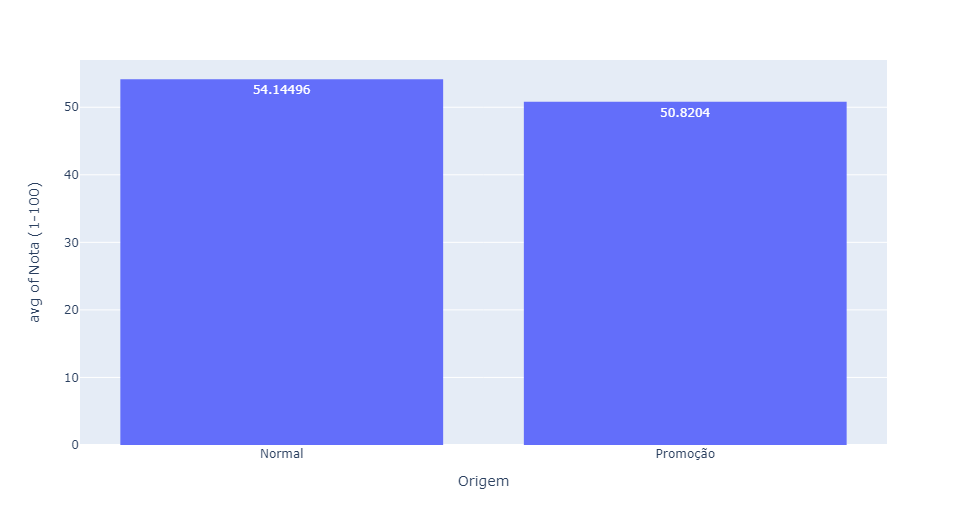

### Análise gráfica – Idade x Nota

Nesse gráfico nós temos a
comparação entre a Idade do
cliente e a Nota.
Aqui você já nota que no primeiro
bloco, que é onde temos as idades
de 0 a 9 temos uma média de nota
muito mais baixa, mas se você
reparar, não faz muito sentido ter
esse tipo de dado na nossa base não
é mesmo?
Até porque pessoas dessa idade não
estariam comprando, muito menos
teriam profissões, então isso pode
ter sido algum erro na base de
dados que pode ser tratado
também.
Uma sugestão poderia ser a
remoção das linhas onde temos
idade inferior a 18 por exemplo.
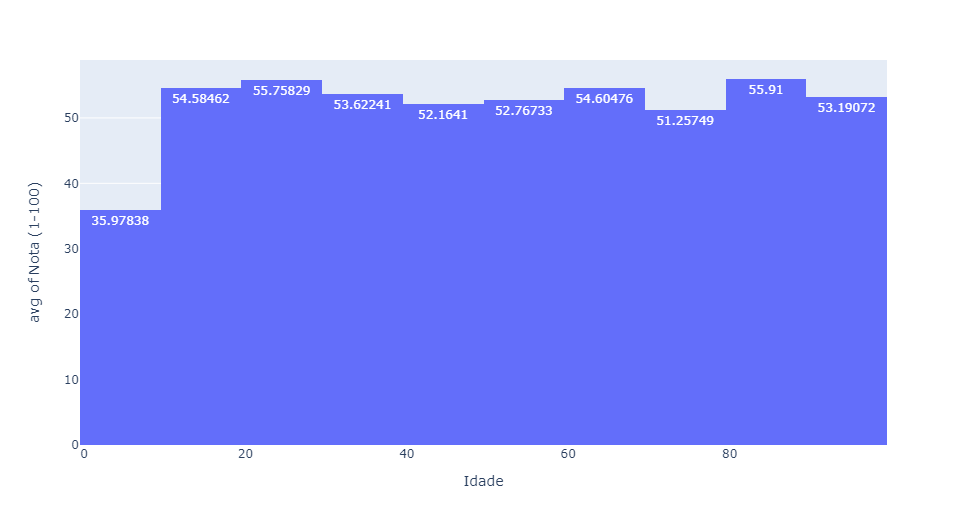

### Análise gráfica – Salário x Nota

Nesse gráfico nós temos a
comparação entre o Salário do
cliente e a Nota.
Veja que o nosso palpite inicial era
de que o salário seria um fato para
classificar um cliente com uma nota
mais alta.
Mas pela análise gráfica esse não é
um fator de muita relevância na
hora de fazer essa classificação de
nota entre os clientes.
Claro que temos uma nota um
pouco menor entre os clientes que
recebem de R$60.000 a R$79.999
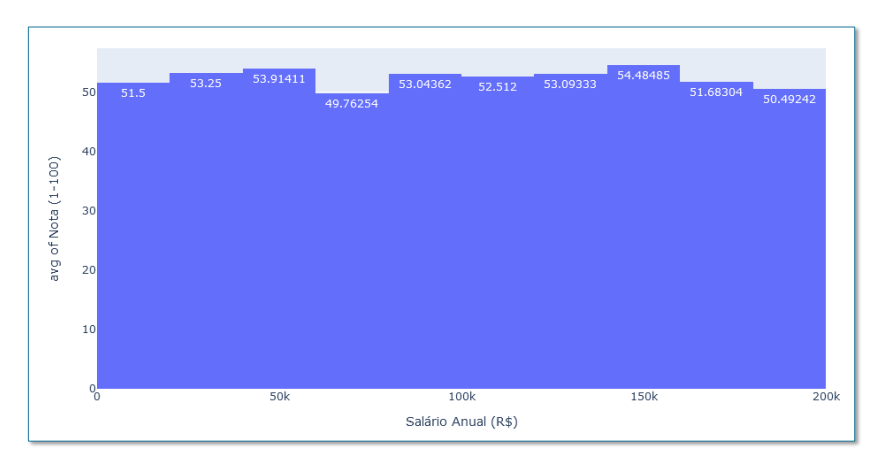

### Análise gráfica – Profissão x Nota
Nesse gráfico nós temos a
comparação entre a Profissão do
cliente e a Nota.
Veja como esse gráfico já se
diferencia dos outros. Aqui
claramente temos uma diferença
entre notas em relação a profissão.
Nesse caso podemos verificar que as
profissões Entretenimento e Artista
possuem média de nota mais
elevada do que as outras profissões.
Isso quer dizer que já temos um
elemento que pode ser muito
interessante na hora de escolher um
cliente.
Isso quer dizer que os clientes das
profissões Entretenimento e Artista
tendem a terem uma nota maior do
que as demais profissões.Então se você tivesse que escolher um cliente por profissão, certamente seria uma
dessas duas para que ele tenha uma Nota mais elevada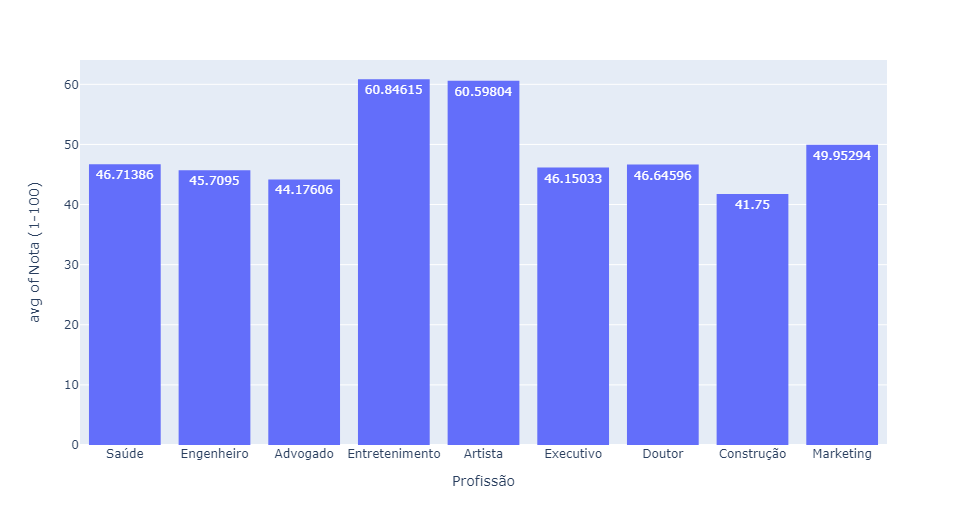

### Análise gráfica – Experiência x Nota

Nesse gráfico nós temos a
comparação entre a Experiência do
cliente e a Nota.
Aqui podemos verificar que
também temos informações bem
relevantes para a classificação do
nosso cliente.
Veja que os clientes de 10 a 15 anos
de experiência já possuem uma
nota superior aos outros. Os clientes
de 2 a 3 anos também possuem
uma média de nota muito boa.
Mas por outro lado os clientes de 0 a
1 ano e acima de 15 anos de
experiência já não possuem notas
muito interessantes.
Neste caso você poderia considerar os clientes nessas duas faixas de experiência.
Está começando a entender como é importante esse tipo de análise? Você começa a
notar alguns padrões que podem ajudar muito na sua tomada de decisões. 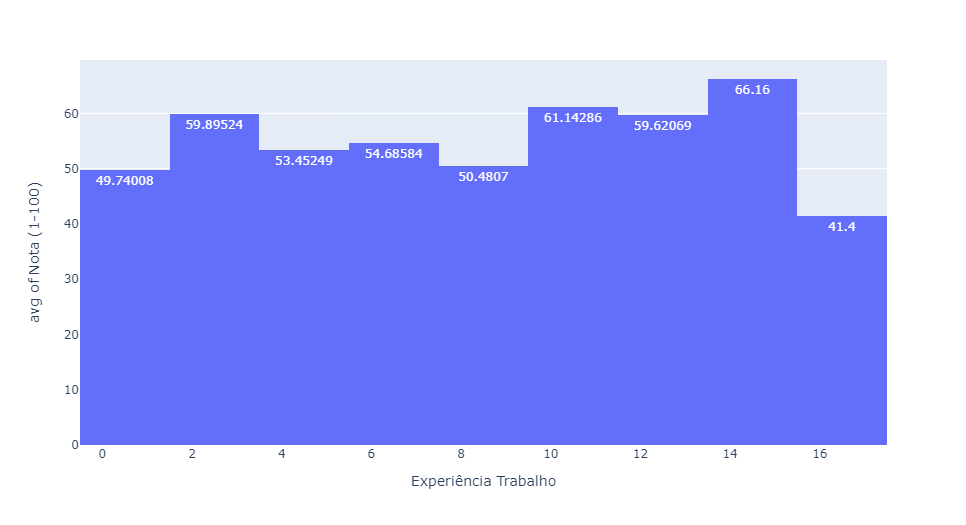

### Análise gráfica – Tamanho Família x Nota

Nesse gráfico nós temos a
comparação entre o Tamanho
Família do cliente e a Nota.
Para essa última análise podemos
notar que clientes acima de 7
membros na família já possuem
notas muito inferiores.
Aqui não temos um elemento para
classificar clientes com boas notas,
mas já temos informações para
saber que esses clientes tendem a
ter notas muito mais baixas. 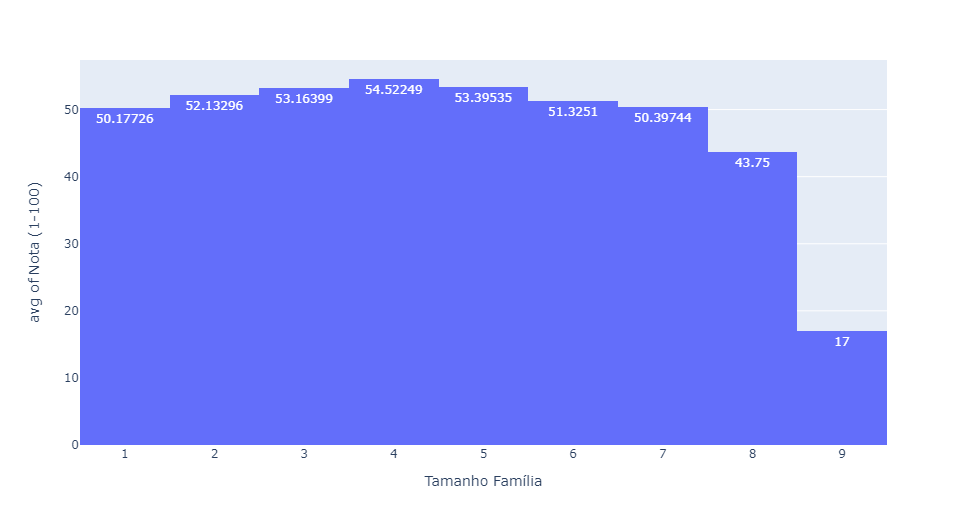

## Análise gráfica – Conclusão
Você conseguiu entender a importância de fazer uma análise de dados? Principalmente com uma base de dados tratada?
Esses são fatores que muitas das pessoas nas empresas acabam deixando passar e isso pode levar a tomada de decisões muito
erradas dentro das empresas.
Então sempre que for trabalhar com análise de dados é importante que você saiba o seu problema, aonde quer chegar, o que
precisa resolver.
Depois disso você já sabe qual o caminho trilhar e quais análises precisa fazer. Só não pode se esquecer de fazer o tratamento
de dados correto da sua base de dados para que considere apenas informações relevantes.
De nada vale fazer diversas análises de dados complexas, com inúmeros cálculos se você estiver utilizando informações inúteis
ou até mesmo inválidas.